# CAD layout reading

Tests done on [floor plan](https://drive.google.com/file/d/1Xw-cIvnZdvCMmrIfRs5FkywCXhw-ASOz/view?usp=sharing) which can be visualized using AutoCAD, [ShareCAD](https://sharecad.org/) or [Autodesk Viewer](https://viewer.autodesk.com/)

In [1]:
# Uncomment if its not run inside the repository
# !python -m pip install --no-cache git+https://github.com/ekumenlabs/Frontier-Exploration-with-a-prior.git@master

In [2]:
import os

base_dir = os.getcwd()
files_dir = f"{base_dir}/files"

## Layout reading in `.dxf` format

In [9]:
from FrontierExploration.preprocessing.layout.reader import LayoutReader, OccupancyDataFrame

layout_reader = LayoutReader(file_name=f"small_house_polygon", file_extension="dxf", files_dir=f"{files_dir}/")
# layout_reader.clean_and_save(f"{files_dir}/planta_murguiondo.dxf", f"{files_dir}/planta_murguiondo_clean.dxf", ["Muro", "Vereda", "Cordón"], ["LINE", "ARC"])
layout_reader.create_clean_dxf(f"{files_dir}/small_house_clean_test.dxf", ["GAZEBO"], ["LINE", "LWPOLYLINE"])

## Layout conversion to occupancy grid
Once the CAD layout has been uploaded, we will create the occupancy grid, defined by squares of `square_size` size, which will be suporposed over the obtained layout.
Having done this, the grid squares that touch the layout lines, will be the ones defined as **occupied blocks** in the occupancy grid.

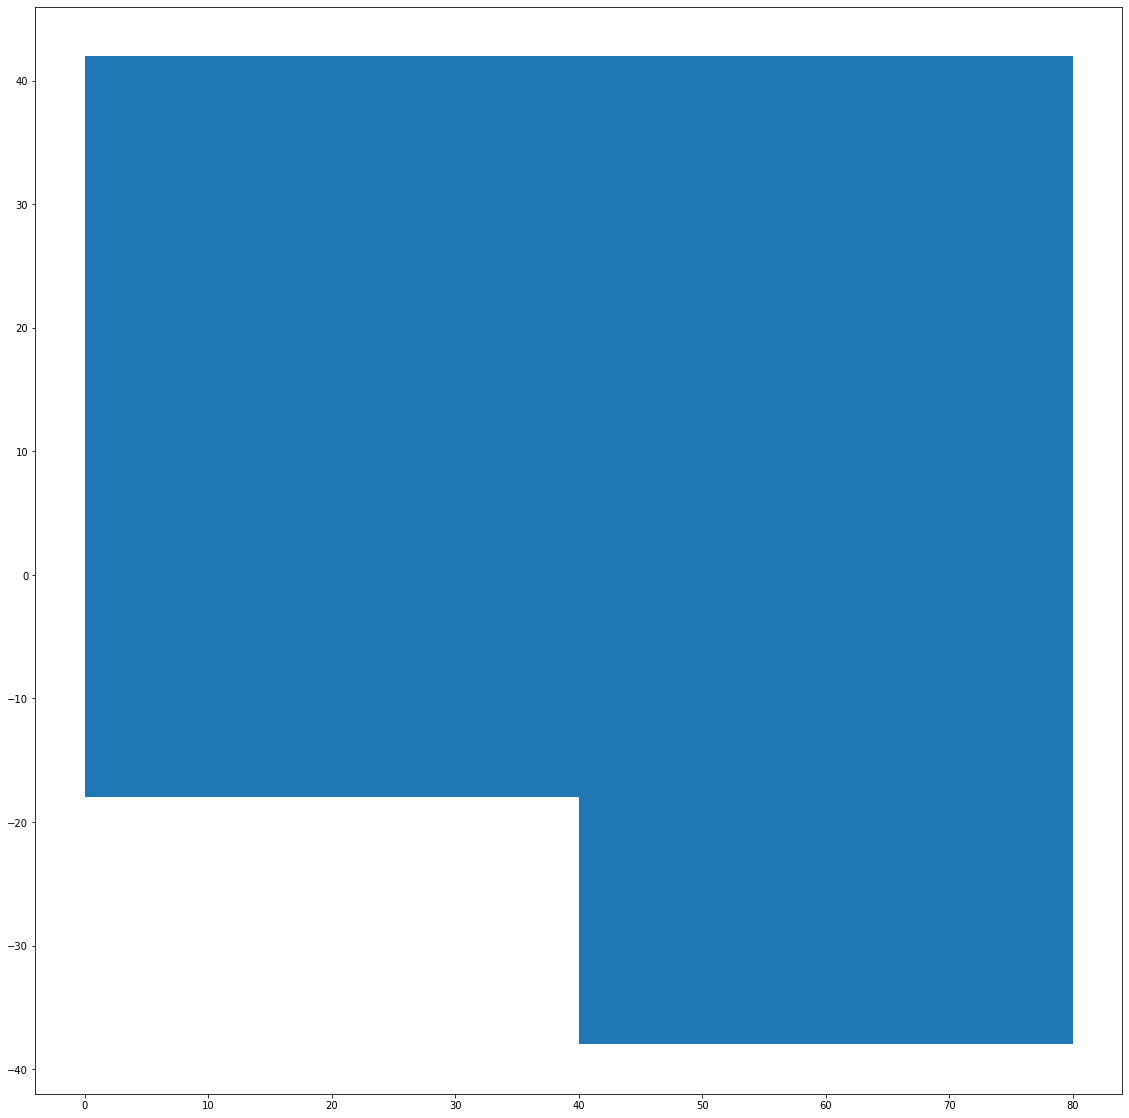

In [4]:
# occupancy_df = OccupancyDataFrame(f"{files_dir}/planta_murguiondo_clean.dxf", square_size=500)
occupancy_df = OccupancyDataFrame(f"{files_dir}/small_house_clean.dxf", square_size=20)
occupancy_df.plot(figsize=(20,20))

In [5]:
occupancy_df.occupancy_df

axis_y,-28.0,-8.0,12.0,32.0
axis_x,,,,
-10.0,0.0,0.0,0.0,0.0
10.0,0.0,1.0,1.0,1.0
30.0,0.0,1.0,1.0,1.0
50.0,1.0,1.0,1.0,1.0
70.0,1.0,1.0,1.0,1.0


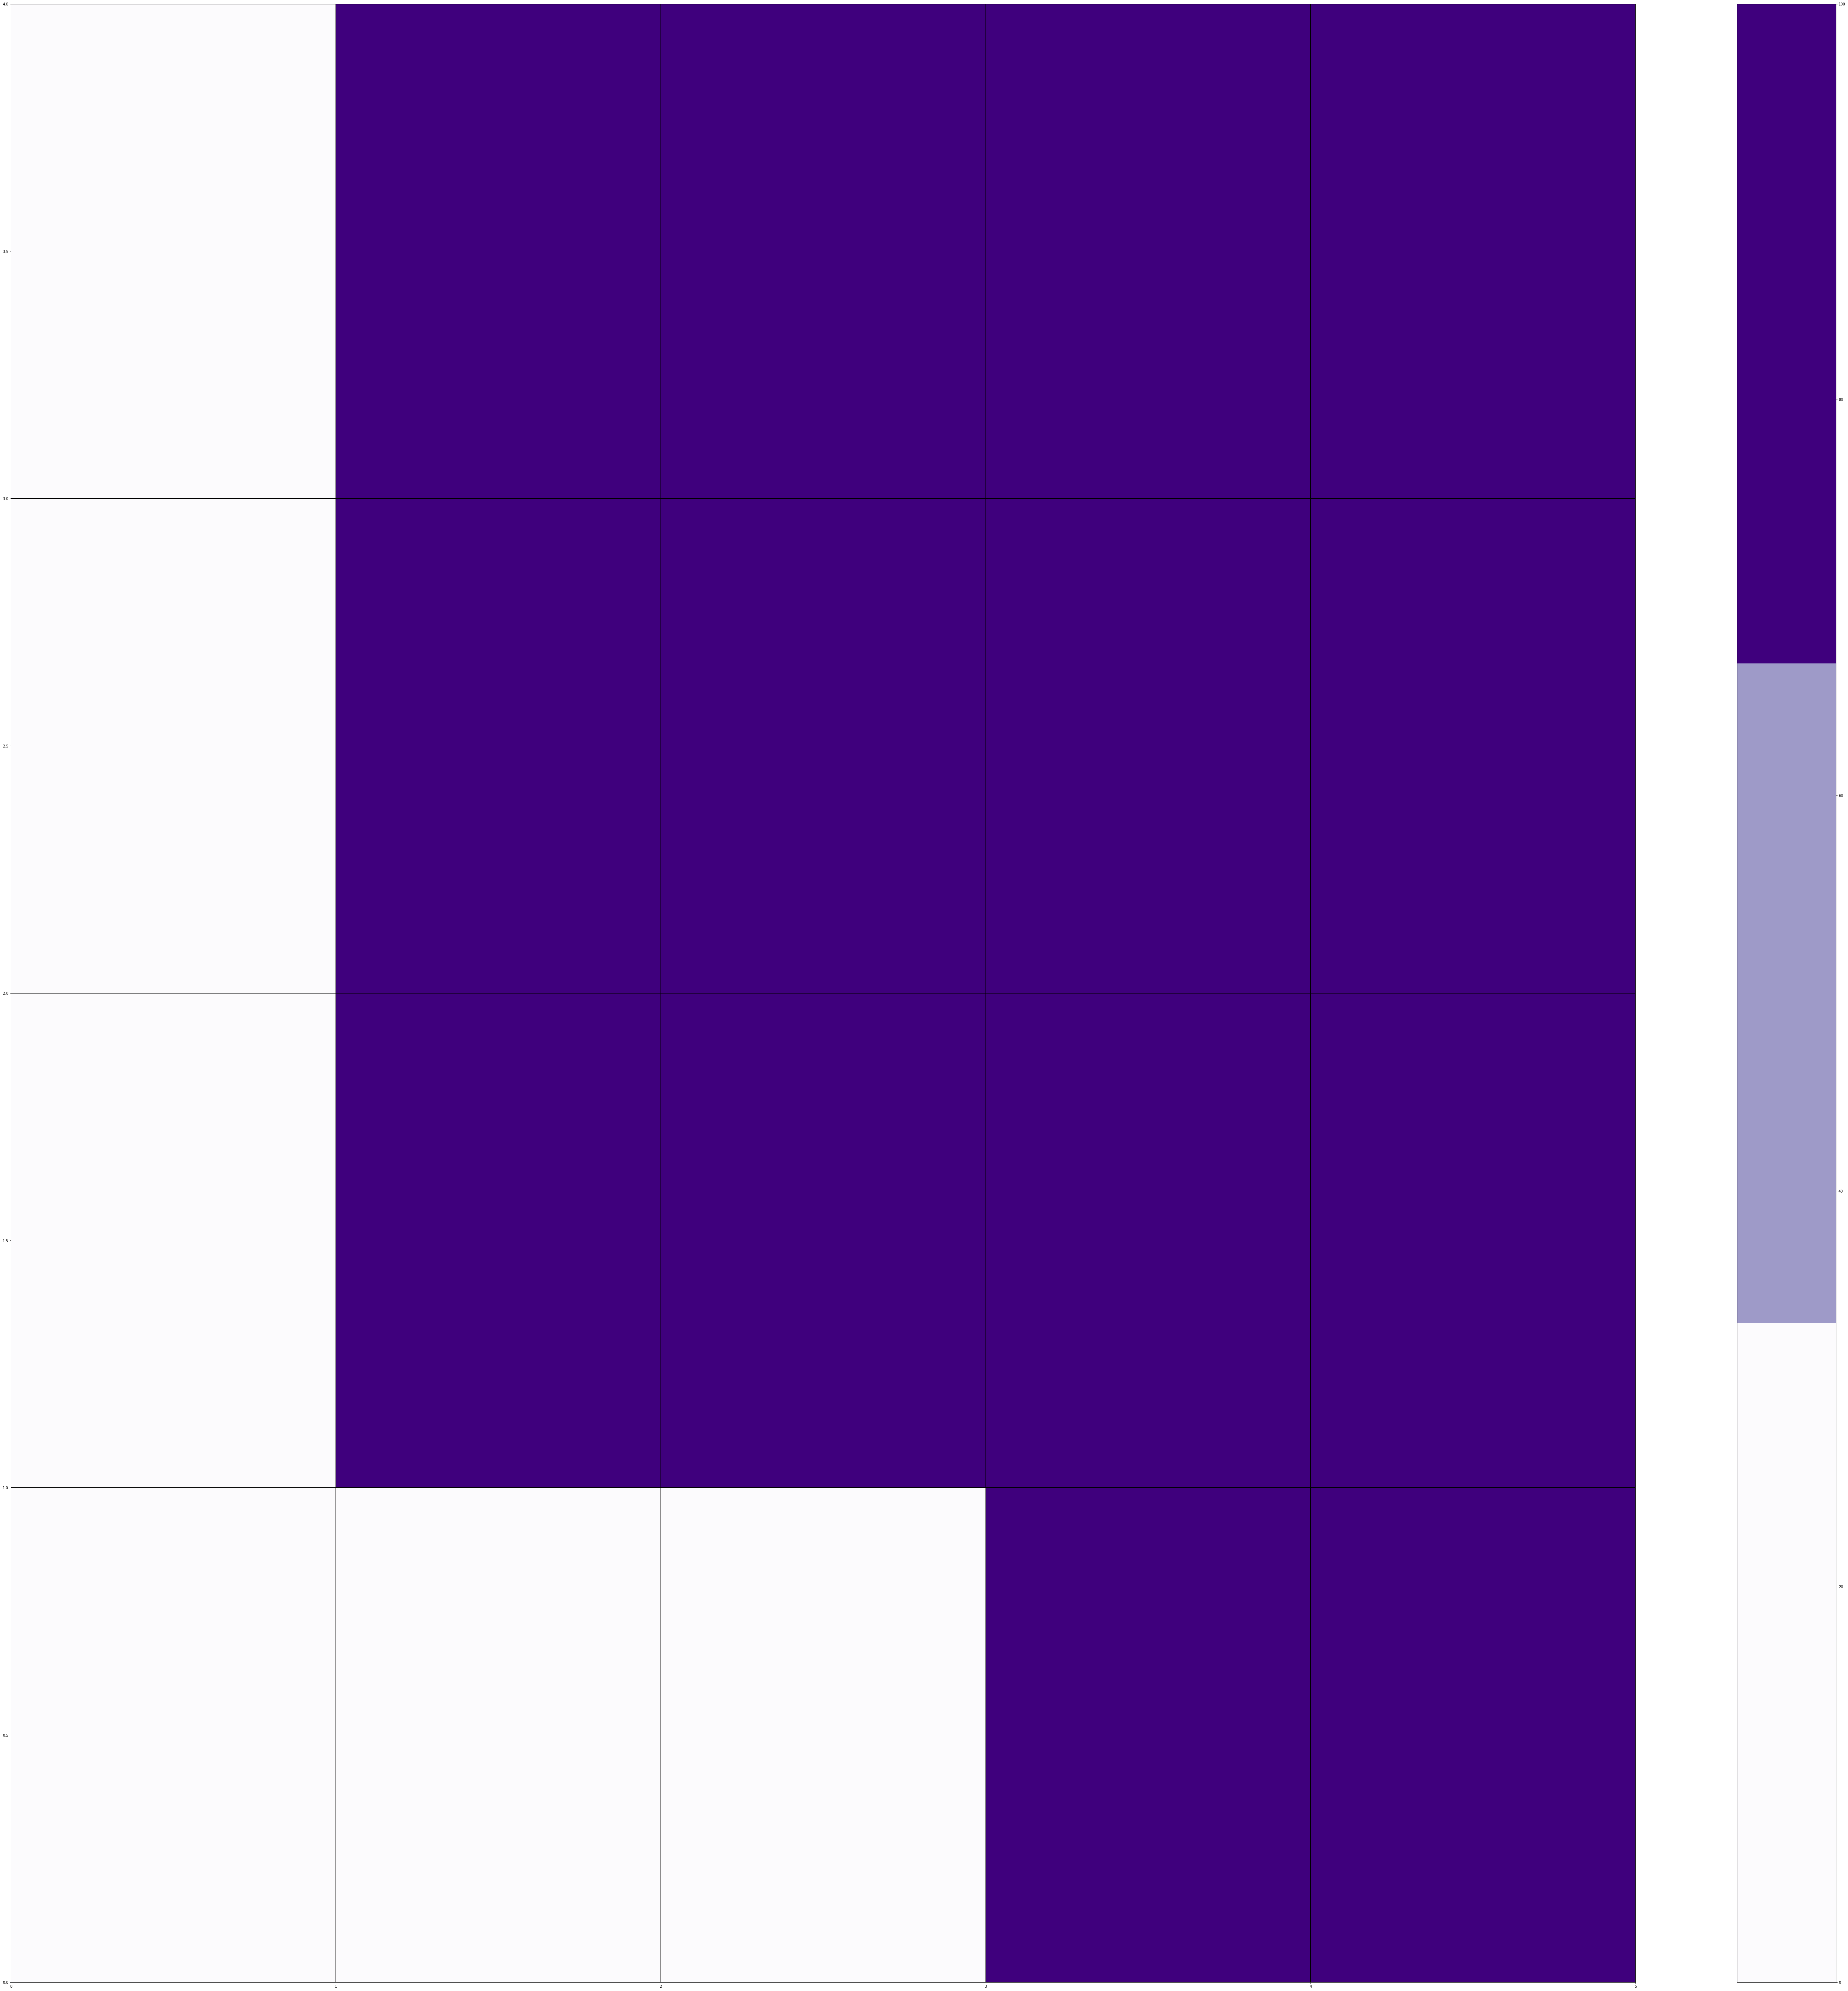

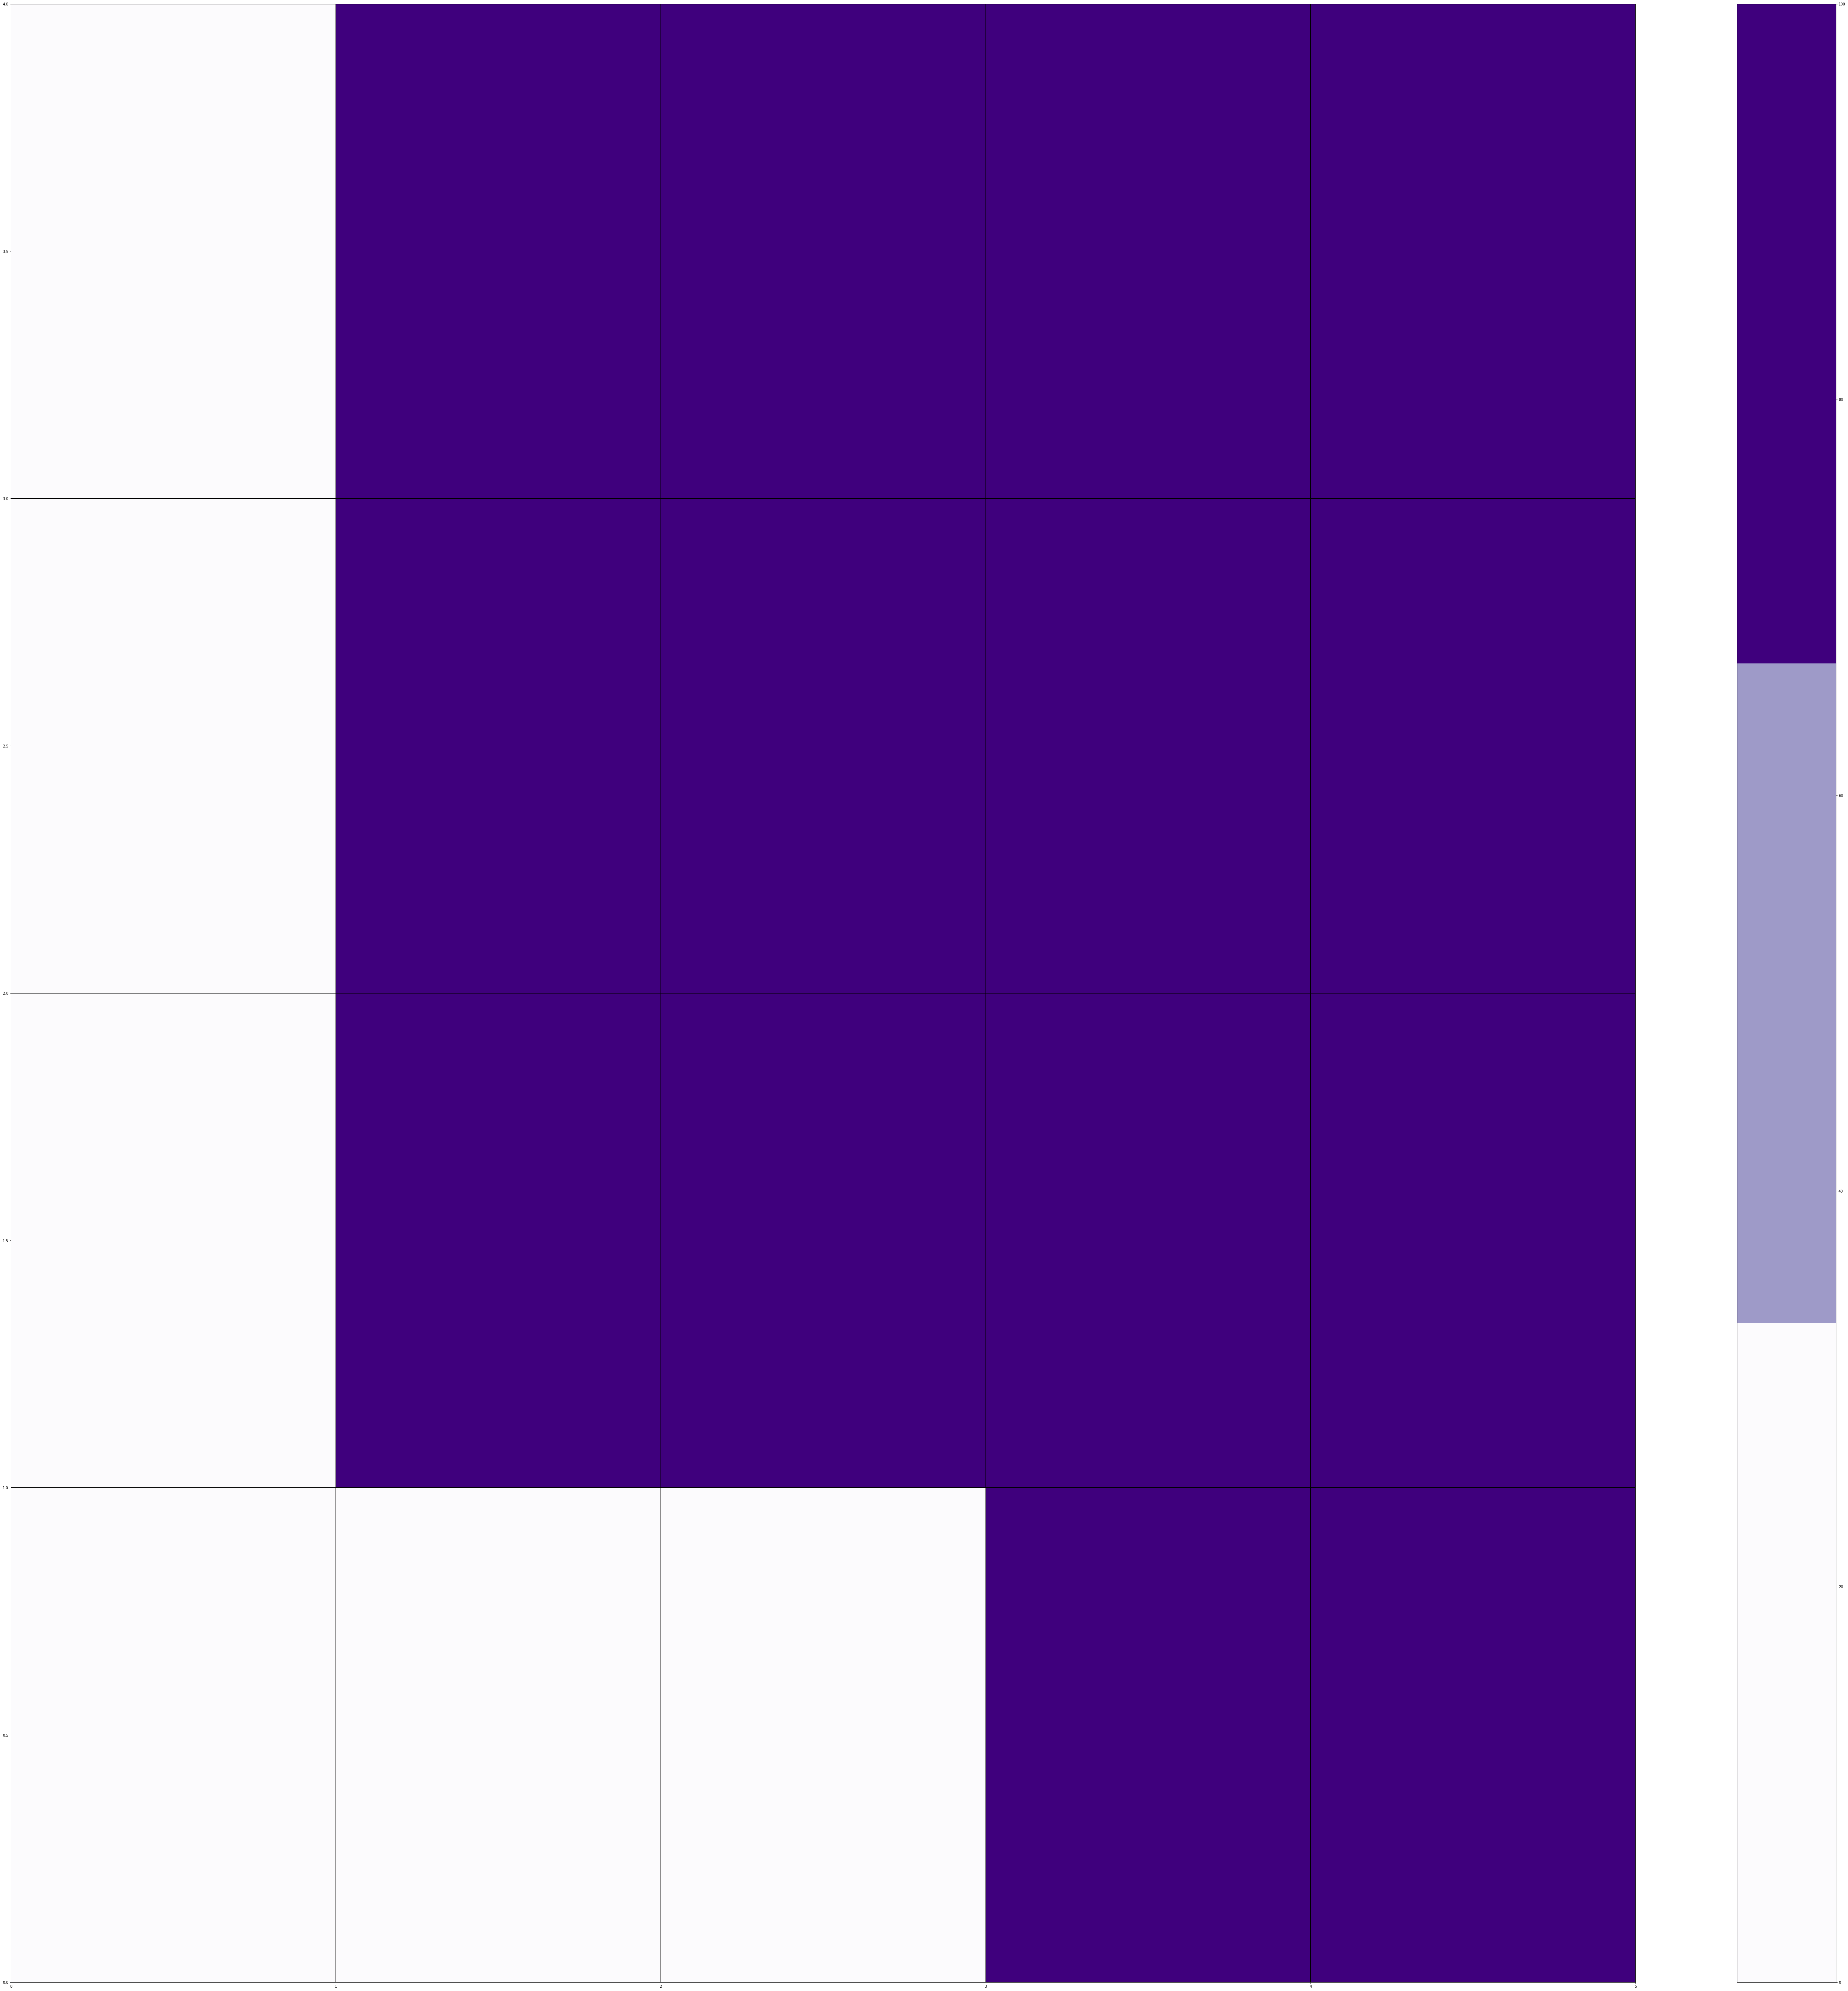

In [6]:
grid = occupancy_df.get_occupancy_grid()
grid.plot(figsize=(100,100))

In [7]:
import pickle

# output_file = f"{files_dir}/planta_murguiondo_grid.pkl"
output_file = f"{files_dir}/small_house_grid.pkl"

with open(output_file, "wb") as file:
    pickle.dump(grid, file)

In [8]:
import geopandas as gpd
from shapely.geometry import shape, mapping, Polygon

layout = gpd.read_file(f"{os.getcwd()}/files/small_house_clean.dxf")
# layout.plot(figsize=(100,100))
x, y = layout.convex_hull[0].coords.xy
print(x[0])
print(y)

NotImplementedError: Component rings have coordinate sequences, but the polygon does not